In [8]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
current_dir = os.getcwd()
root_dir = os.path.abspath(os.path.join(current_dir, '..', '..'))
data_dir = os.path.join(root_dir, 'data')
data_file_path = os.path.join(data_dir, 'breast_cancer_data.csv')

df_breast_cancer = pd.read_csv(data_file_path, sep=",", header=0)

# EDA (Exploratory Data Analysis)

In [4]:
df_breast_cancer.dtypes

Age                        int64
Race                      object
Marital Status            object
T Stage                   object
N Stage                   object
6th Stage                 object
differentiate             object
Grade                     object
A Stage                   object
Tumor Size                 int64
Estrogen Status           object
Progesterone Status       object
Regional Node Examined     int64
Reginol Node Positive      int64
Survival Months            int64
Status                    object
dtype: object

In [5]:
# Missings
df_breast_cancer.isna().sum()

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

## Univariate Analysis

In [28]:
def analyze_univariate(df, column_name):
    if df[column_name].dtype in ['int64', 'float64']:
        # Summary statistics
        stats = df[column_name].describe()
        iqr = stats['75%'] - stats['25%'] 

        # Mild Outliers
        mild_ub = stats['75%'] + 1.5 * iqr
        mild_lb = max(stats['25%'] - 1.5 * iqr, 0)

        mild_outliers = np.sum((df[column_name] > mild_ub) | (df[column_name] < mild_lb))
        print("Number of mild outliers in " + column_name + ": ", mild_outliers)

        # Severe Outliers
        severe_ub = stats['75%'] + 3 * iqr
        severe_lb = max(stats['25%'] - 3 * iqr, 0)
        severe_outliers = np.sum((df[column_name] > severe_ub) | (df[column_name] < severe_lb))
        print("Number of severe outliers in " + column_name + ": ", severe_outliers)

        if severe_outliers > 0:
            # Print 5 largest severe outliers
            severe_outlier = df[(df[column_name] > severe_ub) | (df[column_name] < severe_lb)]
            severe_outlier = severe_outlier.sort_values(by=column_name, ascending=False)
            print("\nThe first 5 largest severe outliers in " + column_name + ":")
            print(severe_outlier.head(5))

        outliers = (df[column_name] < severe_lb) | (df[column_name] > severe_ub)
        df.loc[outliers, 'sev_univar_outlier'] += 1

        # Plotting Boxplot and Histogram
        fig, axes = plt.subplots(1, 2, figsize=(14, 6))

        # Boxplot with outlier boundaries
        sns.boxplot(x=df[column_name], ax=axes[0])
        axes[0].set_title(f"Outlier Analysis for {column_name}")
        axes[0].axvline(x=mild_ub, color='orange', linewidth=2, label='Mild Outlier Boundary')
        axes[0].axvline(x=mild_lb, color='orange', linewidth=2)
        axes[0].axvline(x=severe_ub, color='red', linewidth=2, label='Severe Outlier Boundary')
        axes[0].axvline(x=severe_lb, color='red', linewidth=2)
        axes[0].legend()

        # Histogram
        sns.histplot(df[column_name], bins=20, kde=True, ax=axes[1])
        axes[1].set_title(f"Histogram of {column_name}")

        plt.tight_layout()
        plt.show()
    else:
        # Categorical Data Histogram
        plt.figure(figsize=(10, 6))
        sns.histplot(data=df, x=column_name, discrete=True)
        plt.title(f"Distribution of {column_name}")
        plt.xticks(rotation=45)
        plt.show()
    # Saving the plot
    plot_path = os.path.join('plots/', f"univ_{column_name}.png")
    plt.savefig(plot_path)

Number of mild outliers in Age:  0
Number of severe outliers in Age:  0


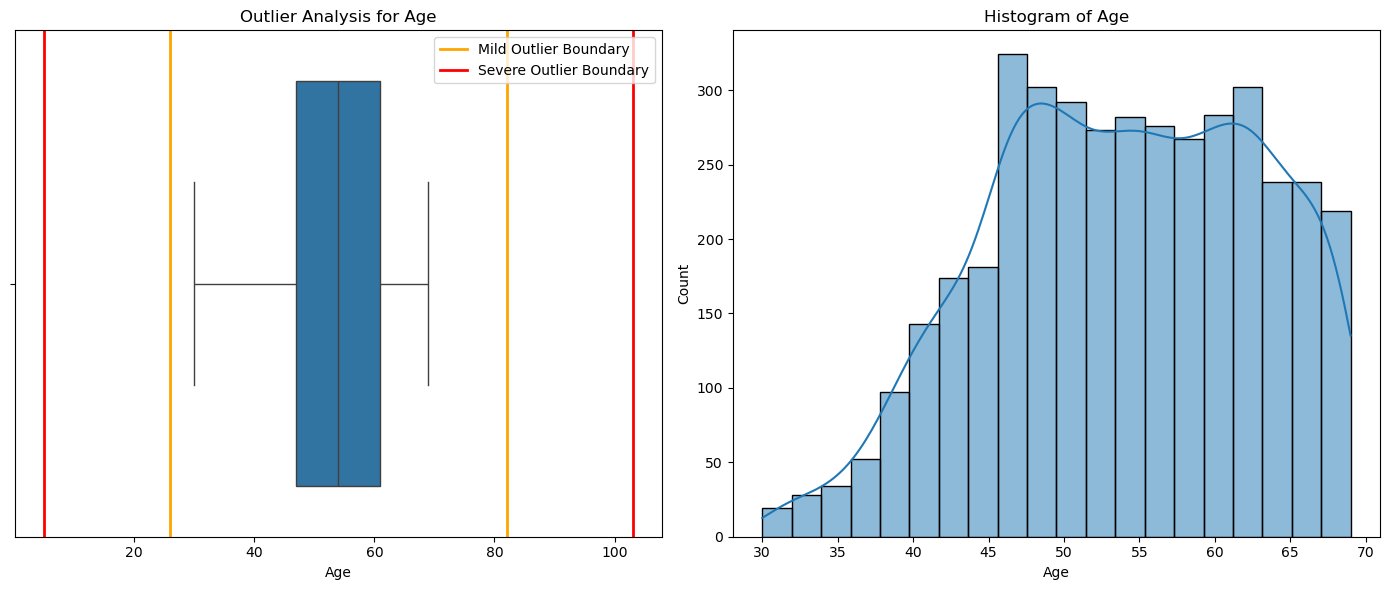

<Figure size 640x480 with 0 Axes>

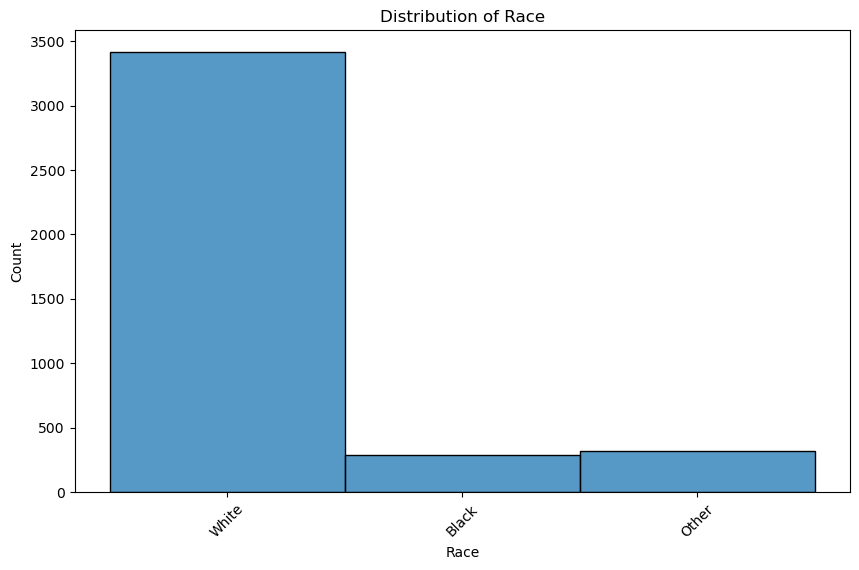

<Figure size 640x480 with 0 Axes>

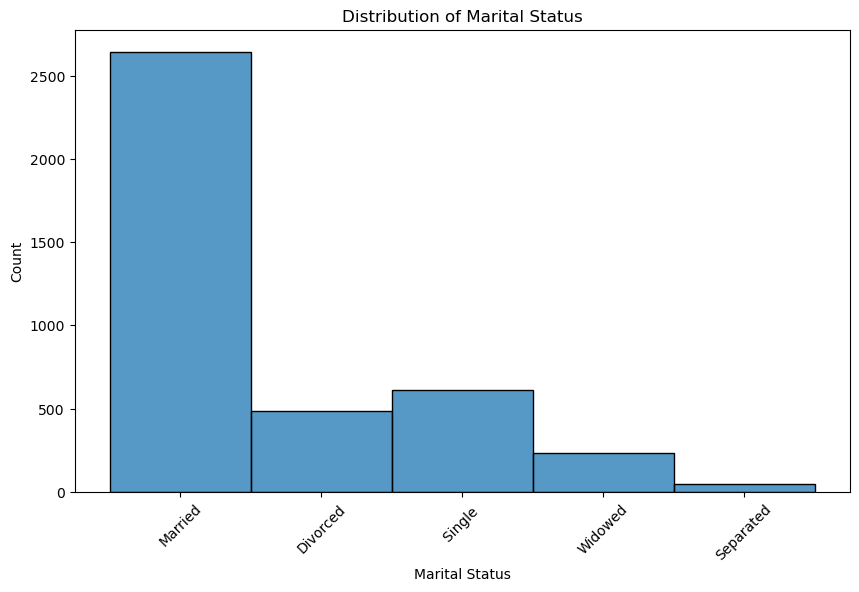

<Figure size 640x480 with 0 Axes>

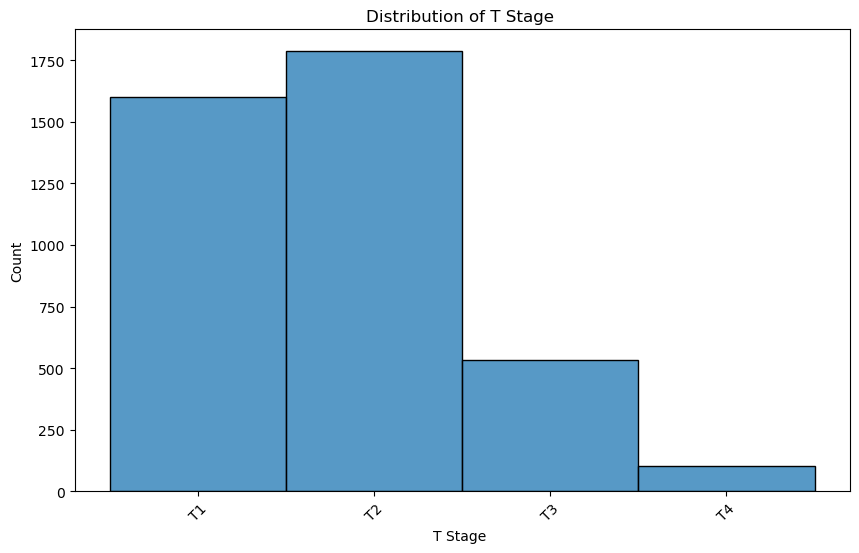

<Figure size 640x480 with 0 Axes>

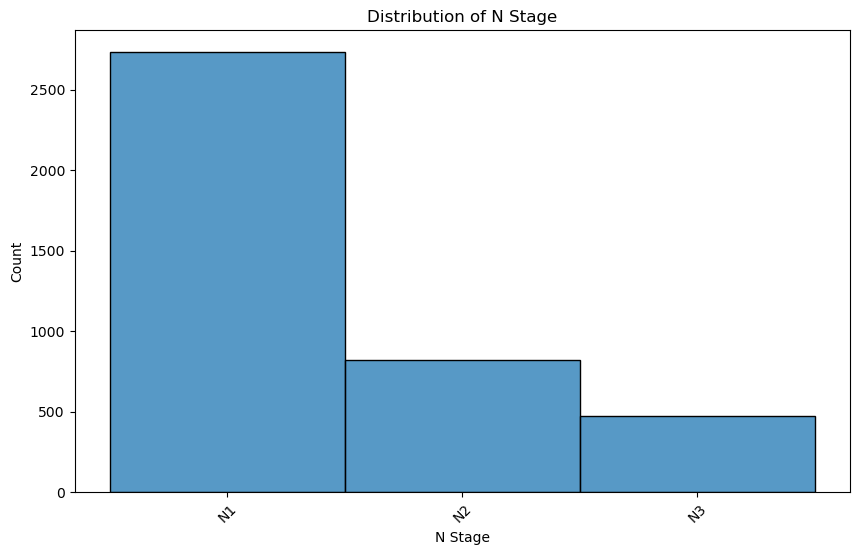

<Figure size 640x480 with 0 Axes>

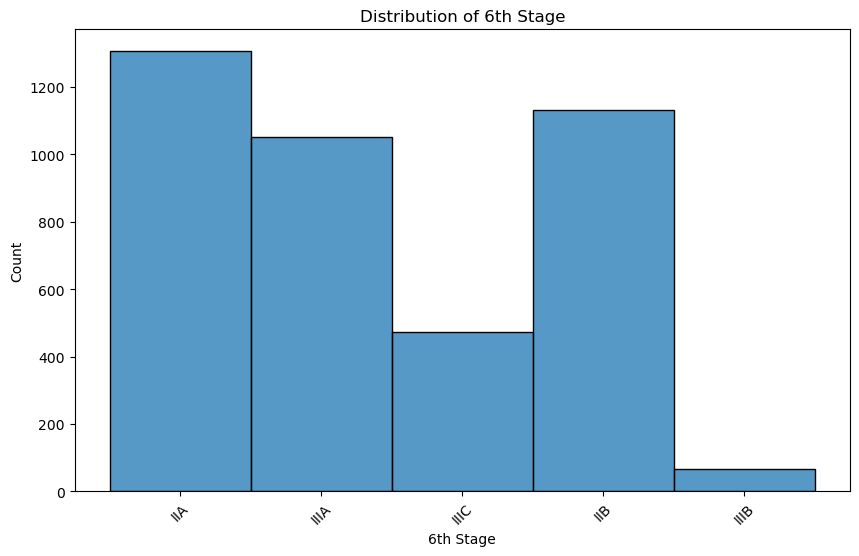

<Figure size 640x480 with 0 Axes>

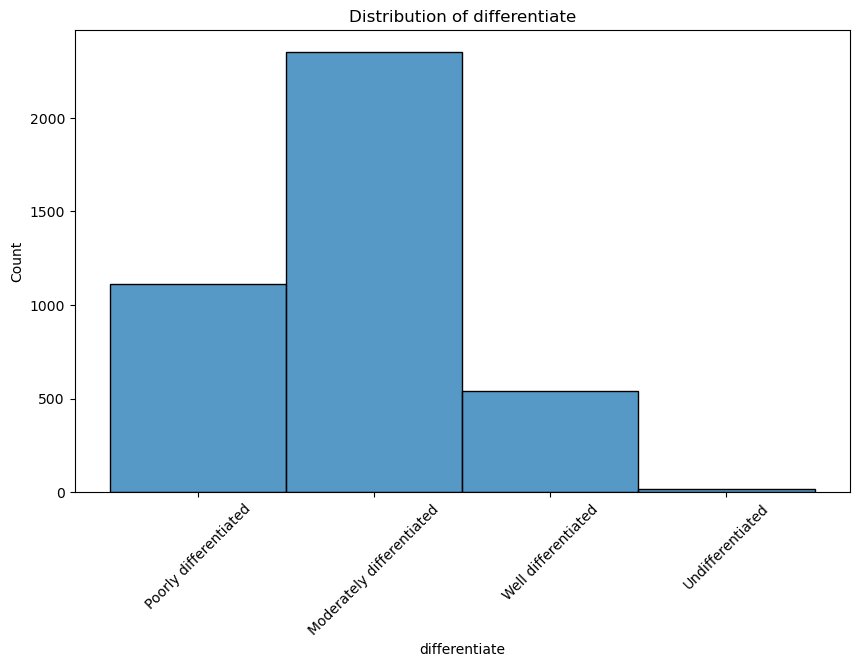

<Figure size 640x480 with 0 Axes>

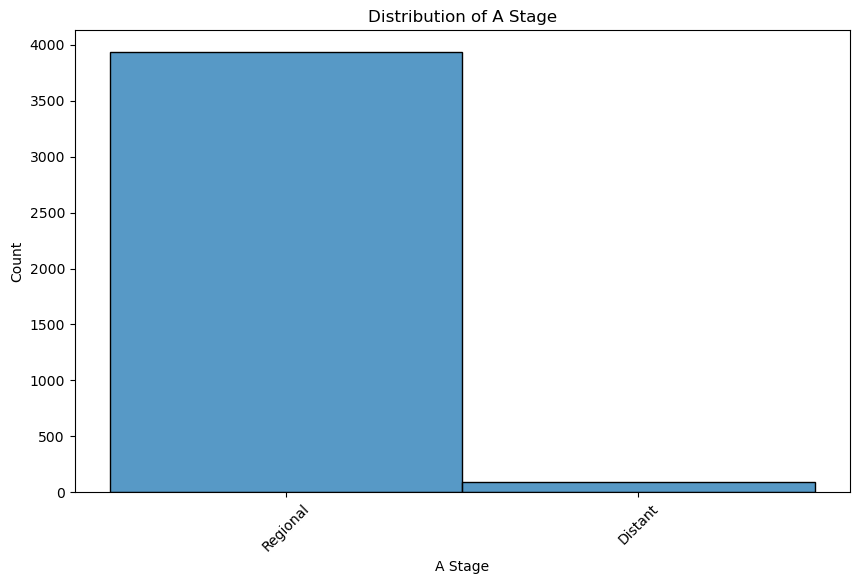

Number of mild outliers in Tumor Size:  222
Number of severe outliers in Tumor Size:  39

The first 5 largest severe outliers in Tumor Size:
      Age   Race Marital Status T Stage  N Stage 6th Stage  \
3965   47  White        Married       T3      N2      IIIA   
289    41  White        Married       T3      N3      IIIC   
1007   60  White       Divorced       T3      N2      IIIA   
740    49  White        Married       T3      N1      IIIA   
1512   63  White        Married       T4      N2      IIIB   

                  differentiate   A Stage  Tumor Size Estrogen Status  \
3965        Well differentiated  Regional         140        Positive   
289       Poorly differentiated  Regional         140        Positive   
1007  Moderately differentiated  Regional         140        Positive   
740   Moderately differentiated  Regional         140        Positive   
1512  Moderately differentiated  Regional         140        Positive   

     Progesterone Status  Regional Node Examine

<Figure size 640x480 with 0 Axes>

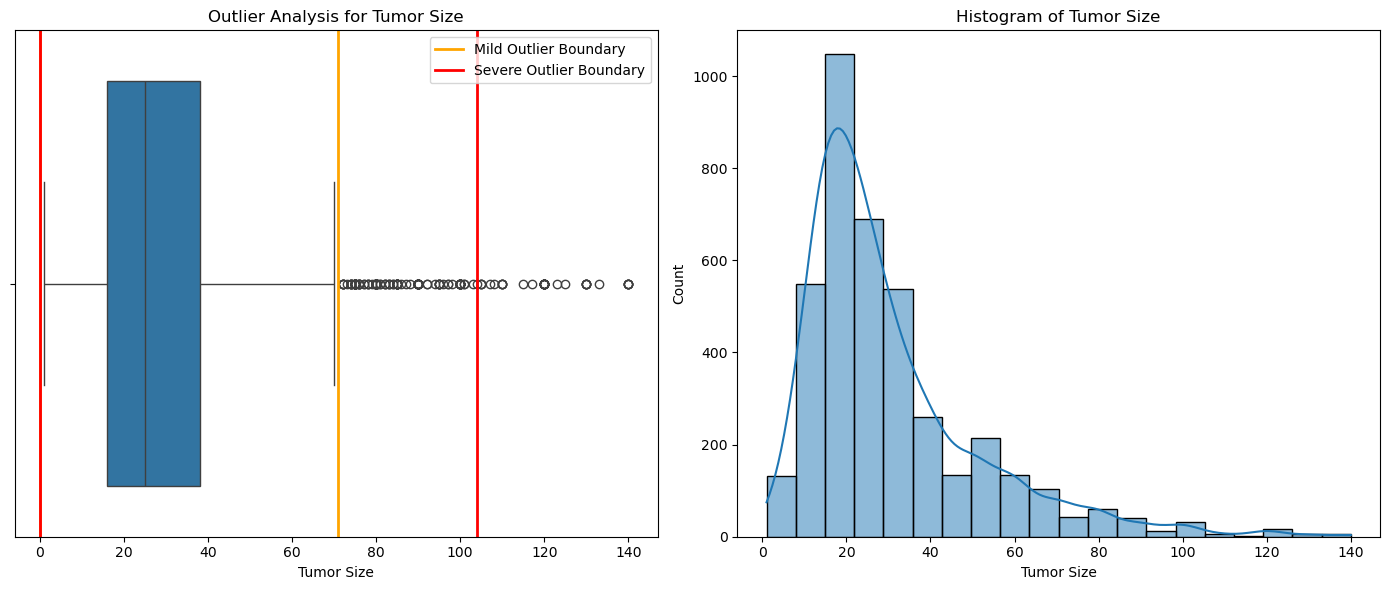

<Figure size 640x480 with 0 Axes>

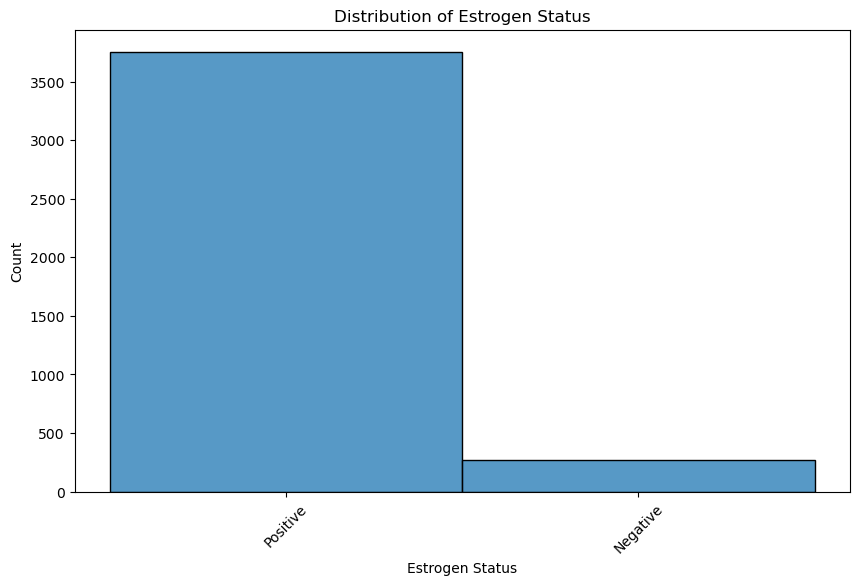

<Figure size 640x480 with 0 Axes>

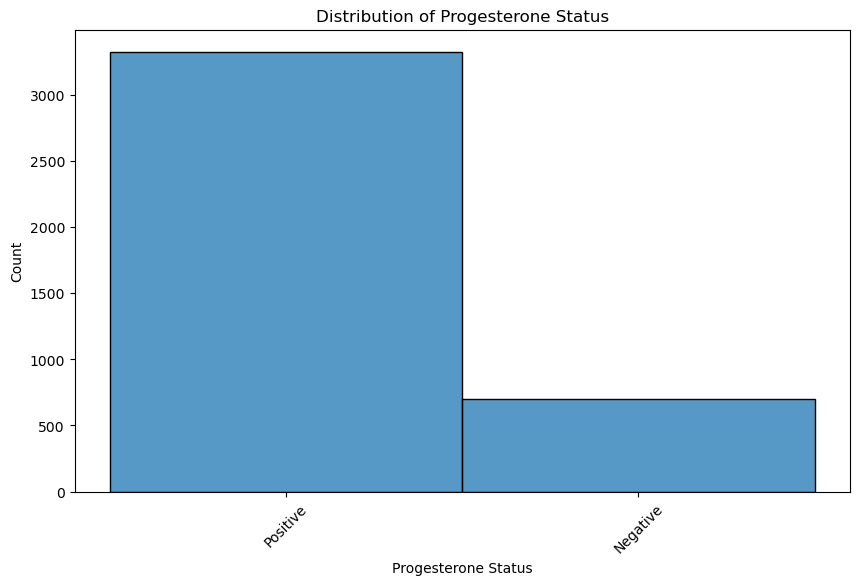

Number of mild outliers in Regional Node Examined:  72
Number of severe outliers in Regional Node Examined:  8

The first 5 largest severe outliers in Regional Node Examined:
      Age   Race Marital Status T Stage  N Stage 6th Stage  \
941    67  Black       Divorced       T2      N2      IIIA   
3950   47  White        Married       T2      N3      IIIC   
2462   51  White        Widowed       T2      N3      IIIC   
633    48  White        Married       T1      N3      IIIC   
2134   49  White        Married       T2      N2      IIIA   

                  differentiate   A Stage  Tumor Size Estrogen Status  \
941   Moderately differentiated  Regional          30        Positive   
3950  Moderately differentiated  Regional          25        Positive   
2462      Poorly differentiated  Regional          40        Positive   
633       Poorly differentiated  Regional          20        Negative   
2134      Poorly differentiated  Regional          28        Positive   

     Progeste

<Figure size 640x480 with 0 Axes>

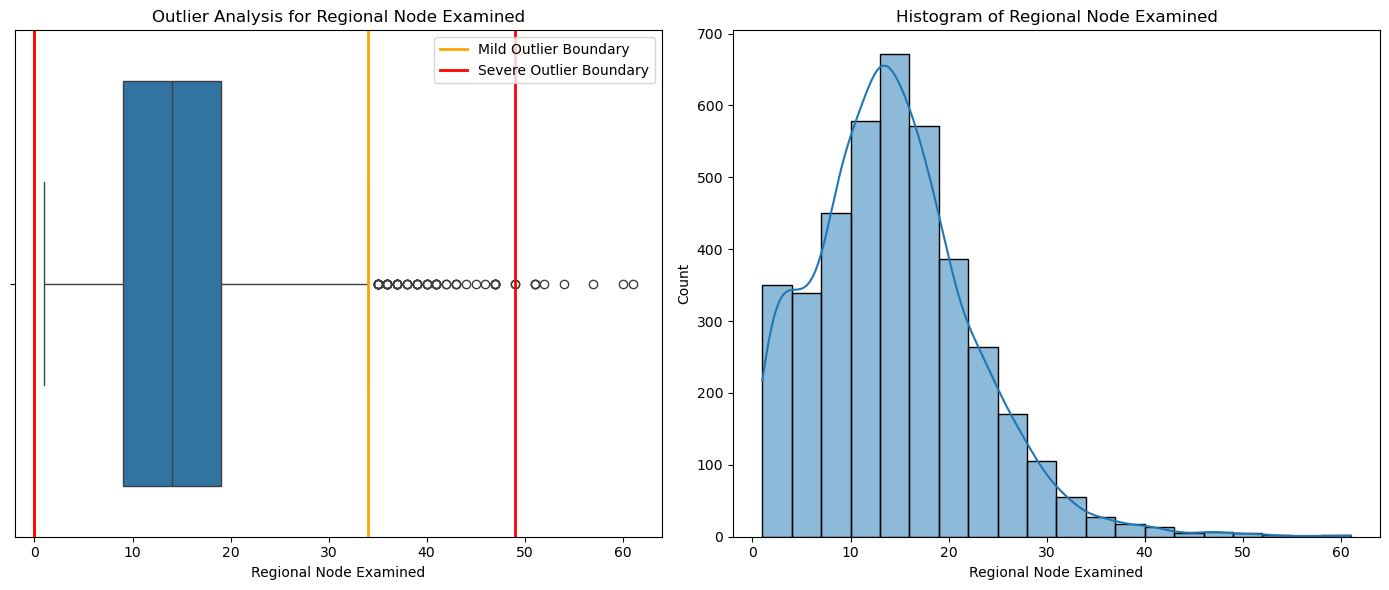

Number of mild outliers in Reginol Node Positive:  344
Number of severe outliers in Reginol Node Positive:  139

The first 5 largest severe outliers in Reginol Node Positive:
      Age   Race Marital Status T Stage  N Stage 6th Stage  \
633    48  White        Married       T1      N3      IIIC   
2182   59  White        Single        T1      N3      IIIC   
1128   63  White       Divorced       T3      N3      IIIC   
989    53  White       Divorced       T2      N3      IIIC   
1267   57  Black      Separated       T2      N3      IIIC   

                  differentiate   A Stage  Tumor Size Estrogen Status  \
633       Poorly differentiated  Regional          20        Negative   
2182      Poorly differentiated  Regional          14        Positive   
1128  Moderately differentiated  Regional          65        Positive   
989   Moderately differentiated   Distant          24        Positive   
1267      Poorly differentiated  Regional          40        Negative   

     Progeste

<Figure size 640x480 with 0 Axes>

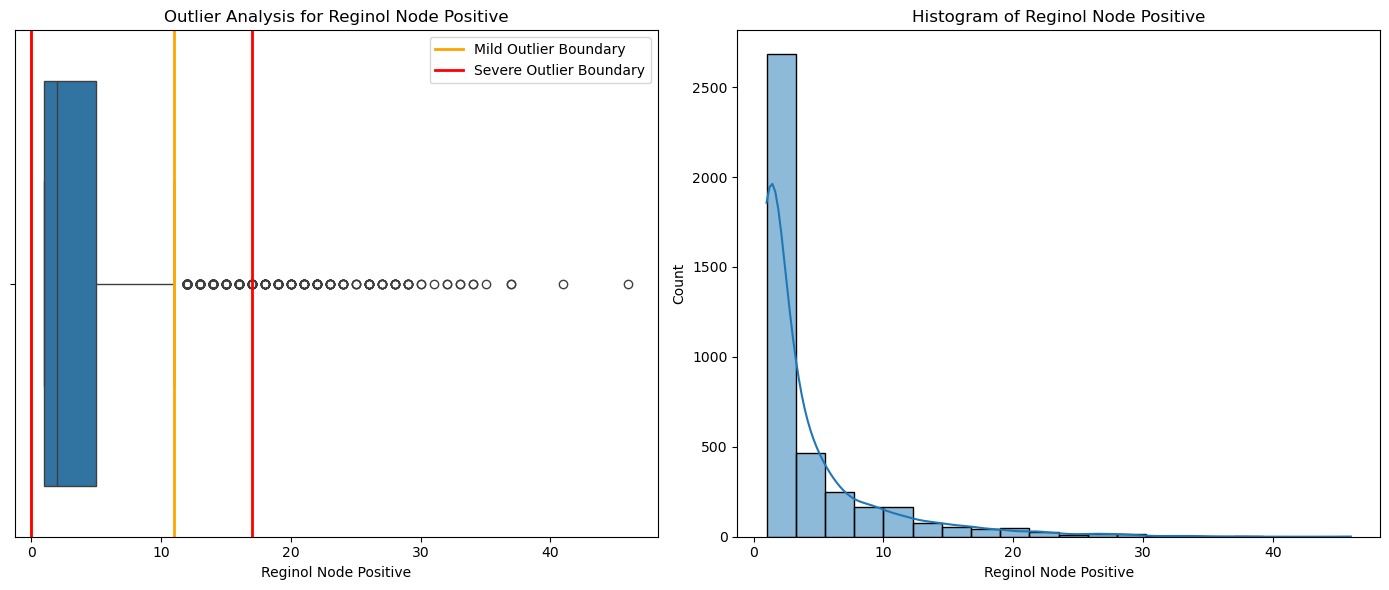

Number of mild outliers in Survival Months:  18
Number of severe outliers in Survival Months:  0


<Figure size 640x480 with 0 Axes>

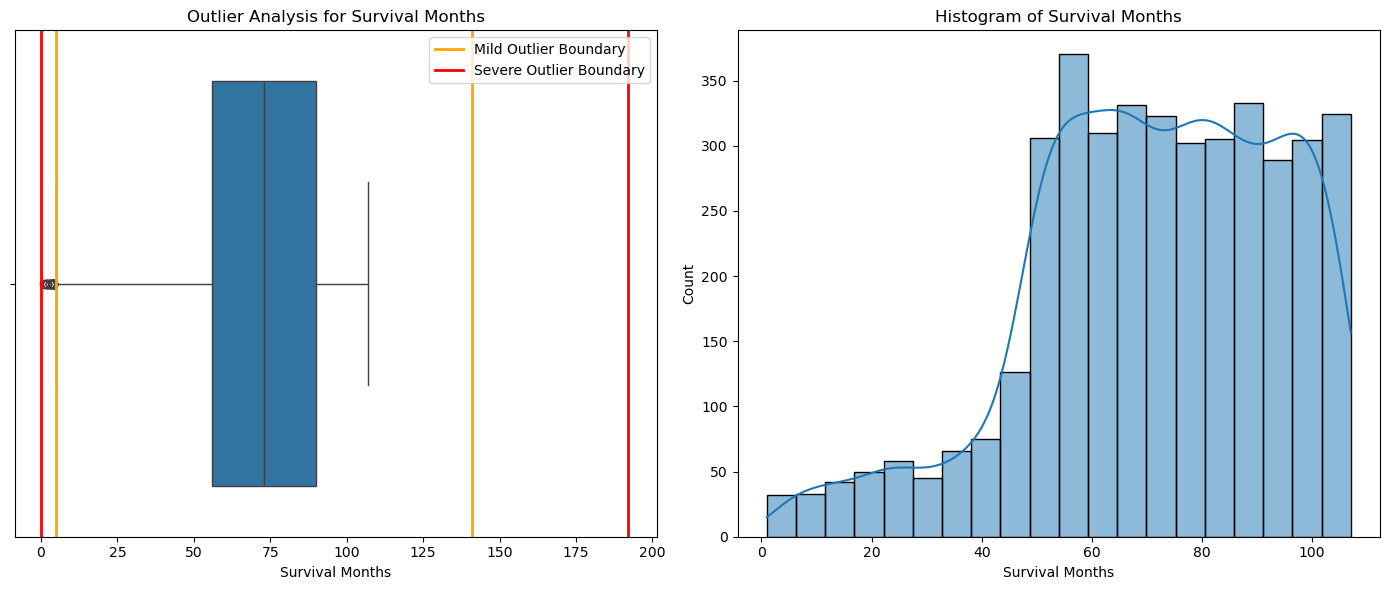

<Figure size 640x480 with 0 Axes>

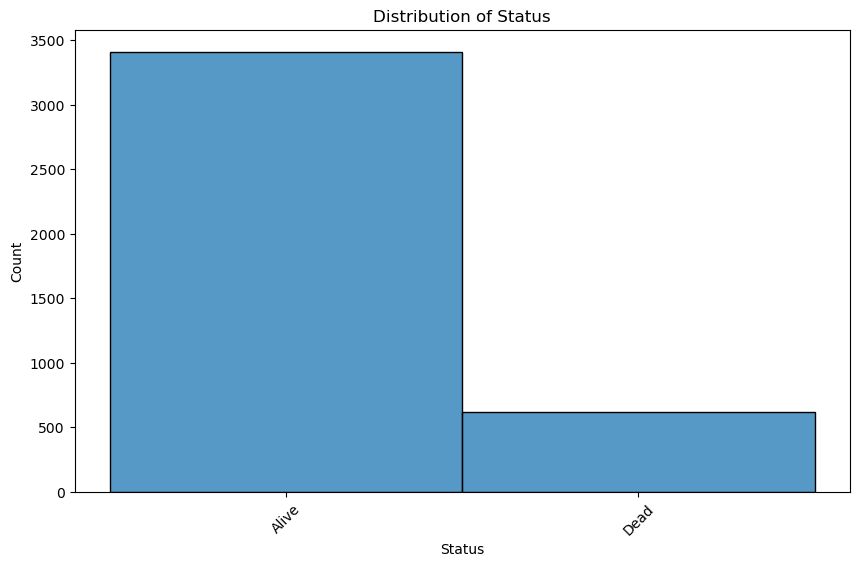

<Figure size 640x480 with 0 Axes>

In [29]:
df_breast_cancer["sev_univar_outlier"] = 0

for col in df_breast_cancer.columns:
    if col not in ['sev_univar_outlier']:
        analyze_univariate(df_breast_cancer, col)

In [18]:
print(df_breast_cancer[df_breast_cancer["sev_univar_outlier"] > 1])

      Age   Race Marital Status T Stage  N Stage 6th Stage  \
238    43  White        Married       T4      N3      IIIC   
633    48  White        Married       T1      N3      IIIC   
3950   47  White        Married       T2      N3      IIIC   

                  differentiate Grade   A Stage  Tumor Size Estrogen Status  \
238       Poorly differentiated     3   Distant         120        Negative   
633       Poorly differentiated     3  Regional          20        Negative   
3950  Moderately differentiated     2  Regional          25        Positive   

     Progesterone Status  Regional Node Examined  Reginol Node Positive  \
238             Negative                      28                     26   
633             Negative                      54                     46   
3950            Positive                      60                     19   

      Survival Months Status  sev_univar_outlier  
238                16   Dead                   2  
633                50   Dead   

We remove the `Grade` variable as it gives the same information as the `differentiate`variable.

In [27]:
df_breast_cancer = df_breast_cancer.drop(columns=['Grade'])

## Bivariate Analysis

In [ ]:
def bivariate_numerical(df):
    target_variable = 'Status'
    num_vars = df.select_dtypes(include=['int64', 'float64']).columns
    
    sns.pairplot(df[num_vars], hue='Status')
    
    df_melted = df.melt(id_vars=target_variable, value_vars=num_vars)

    # Create a box plot categorized by the categorical variable on the y-axis
    sns.catplot(x='variable', y='value', hue=target_variable, kind='box', data=df_melted, height=6, aspect=2)

    # Rotate x-axis labels for better readability if needed
    plt.xticks(rotation=45)

    # Show the plot
    plt.show()

def bivariate_categorical(df):
    target_variable = 'Status'
    cat_vars = df.select_dtypes(include=['object']).columns
    
    # drop status
    cat_vars = cat_vars.drop('Status')
    
    num_plots = len(cat_vars)
    num_cols = 3  # Number of columns in the subplot grid
    num_rows = (num_plots - 1) // num_cols + 1
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
    axes = axes.flatten()
    
    for i, cat_var in enumerate(cat_vars):
        if cat_var == '6th Stage':
            cat_var_positive = df[df[target_variable] == 'Alive'][cat_var].value_counts(normalize=True)
            cat_var_negative = df[df[target_variable] == 'Dead'][cat_var].value_counts(normalize=True)
            classes = ['IIA', 'IIB', 'IIIA', 'IIIB', 'IIIC']
        else:
            if cat_var == 'differentiate':
                df[cat_var] = df[cat_var].replace({"Well differentiated": 'well diff', "Moderately differentiated": 'mod diff', 
                                               "Poorly differentiated": 'poor diff', "Undifferentiated": 'undiff'})
        
            # Calculate proportions for each category ensuring the sum is 100%
            cat_var_positive = df[df[target_variable] == 'Alive'][cat_var].value_counts(normalize=True) * 100
            cat_var_negative = df[df[target_variable] == 'Dead'][cat_var].value_counts(normalize=True) * 100
            cat_var_positive /= cat_var_positive.sum() / 100
            cat_var_negative /= cat_var_negative.sum() / 100
            classes = pd.Series(df[cat_var].unique())
        
        ax = axes[i]
        index = np.arange(len(classes))
        width = 0.35
        ax.bar(index, cat_var_positive, width, label='Alive')
        ax.bar(index + width, cat_var_negative, width, label='Dead')
        ax.set_xlabel(cat_var)
        ax.set_ylabel('Percentage')
        ax.set_title(f'{cat_var} vs {target_variable}')
        ax.set_xticks(index + width / 2)
        ax.set_xticklabels(classes)
        ax.legend()

    # Hide empty subplots
    for j in range(i + 1, num_rows * num_cols):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

def join_barcharts(data1, data2, labels, title='', xlabel='', ylabel='', legend_labels=('Positive', 'Negative')):
    
    n = len(labels)
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(nrows=3, ncols=3)
    index = np.arange(n)
    rects1 = ax.bar(index, data1, width, label=legend_labels[0])
    rects2 = ax.bar(index + width, data2, width, label=legend_labels[1])

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.set_xticks(index + width / 2)
    ax.set_xticklabels(labels)
    ax.legend()

    return fig, ax

In [ ]:
bivariate_numerical(df_breast_cancer[['Age', 'Tumor Size', 'Regional Node Examined', 'Regional Node Positive','Survival Months','Status']])
bivariate_categorical(df_breast_cancer)